In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier


df_train = pd.read_csv("application_train.csv")
#df_float = df_train.select_dtypes(include='float64').fillna(0)
#df_int = df_train.select_dtypes(include='int64').fillna(0)
#df_str = df_train.select_dtypes(include='object').fillna('Unknown')
#df_train = df_int.join(df_float).join(df_str)
df_train = pd.get_dummies(df_train)

df_str = df_train.select_dtypes(include='object').fillna('Unknown')
df_train = df_train.select_dtypes(exclude='object')
df_train = df_train.fillna(df_train.mean())
df_train = df_train.join(df_str)

df_train = pd.get_dummies(df_train)


y = df_train['TARGET']
del df_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.2, random_state = 42)


xgb_model = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)


recall = recall_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
f1_score = f1_score(y_test, xgb_pred)
accuracy = accuracy_score(y_test, xgb_pred)

In [2]:
print('recall:',recall)
print('precision:',precision)
print('f1_score:',f1_score)
print('accuracy:',accuracy)

recall: 0.006465952717720751
precision: 0.5714285714285714
f1_score: 0.012787212787212785
accuracy: 0.919662455489976


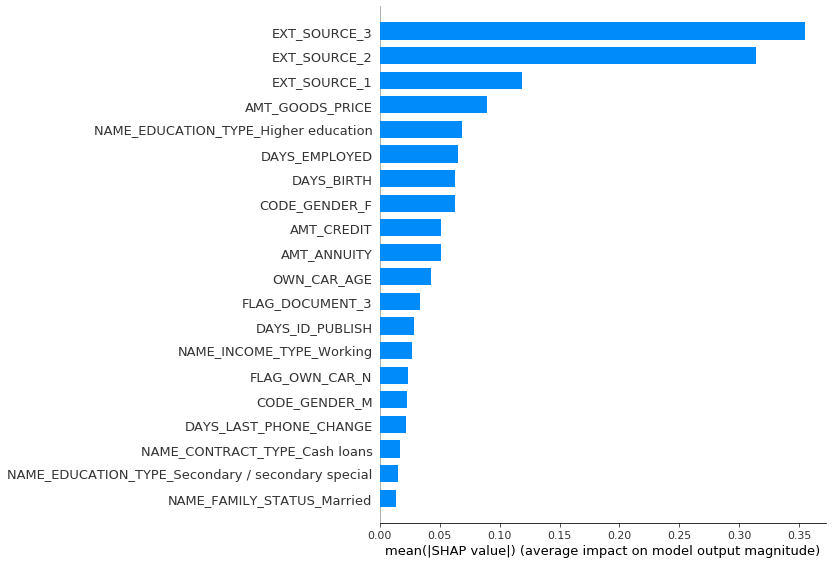

In [3]:
import matplotlib.pyplot as plt
#pip install shap
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar')

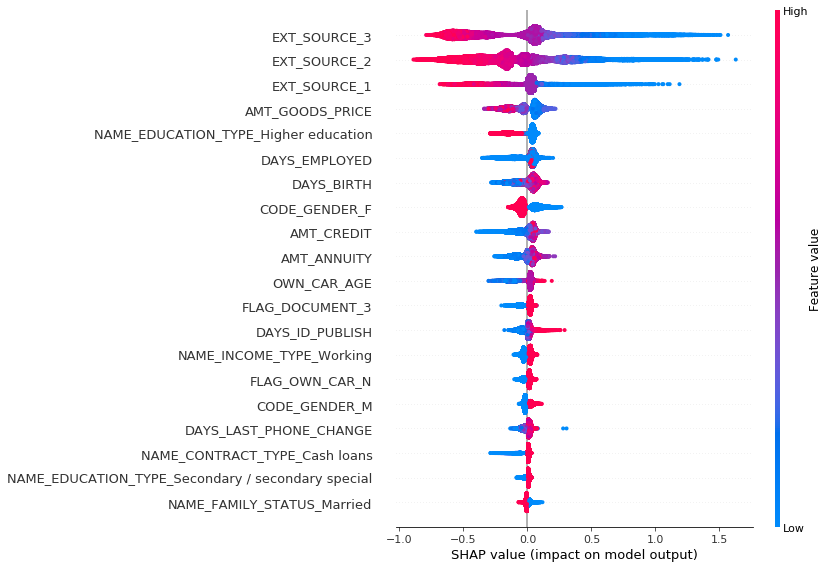

In [4]:
shap.summary_plot(shap_values, X_test)

In [5]:
random_picks = np.arange(1,1721,50)
S = X_test.iloc[random_picks]
shap.initjs()

def shap_plot(j):
    explainerModel = shap.TreeExplainer(xgb_model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

shap_plot(0)